<a href="https://colab.research.google.com/github/sametgirgin/ColabNotebooks/blob/main/Gather_Three_Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HappyPaws, creates fun and educational apps for pet owners.

HappyPaws wants to help pet owners understand their pets better by tracking their activities and health through the app.

The data engineering team is responsible for making sure all the pet data from thousands of users is organized and safe, so pet owners can get tips to keep their pets happy and healthy.

#Task

HappyPaws has collected three datasets over the past year:
 - "pet_activities.csv" which logs daily activities of pets,
 - "pet_health.csv" which records vet visits and health issues, and
 - "users.csv" which contains information about the pet owners.

Each dataset contains unique identifiers for pets and/or their owners.

The engineers developing the app currently write code to cross reference all of these data sources.

They want to make things easier by having a single table with all data included.

Your manager has asked you to write a Python function that cleans and merges these datasets into a single dataset.

The final dataset should provide a comprehensive view of each pet's activities, health records, and owner information.

- To test your code, your manager will run only the code `all_pet_data('pet_activities.csv', 'pet_health.csv', 'users.csv')`
- Your `all_pet_data()` function must return a DataFrame, with columns as described below.
- All columns must accurately match the descriptions provided below, including names.

## Data

The data that has been provided has the following structure

The function that you write must return data as described below. There should be a unique row for each activity/health visit.

Where missing values are permitted, they should be in the default Python format.

|Column Name | Description |
|-------|-------|
| pet_id | Unique identifier for each pet. There should not be any missing values.|
| date | The date of the activity recorded or the date of the health visit, in date format. There should not be any missing values.|
| activity_type | The type of activity, one of 'Walking', 'Playing', 'Resting' or for rows that relate to a health visit, the value 'Health'. Missing values are permitted.|
| duration_minutes | The duration of the activity in minutes. For rows that relate to health visits, this should be 0. Missing values for other activities are permitted.|
| issue | The health issue identified or check-up note. For rows that relate to activities, this should be a missing value. Missing values for health activities are permitted.|
| resolution | The outcome or advice given for the issue. For rows that relate to activities, this should be a missing value. Missing values for health activities are permitted.|
| owner_id | Unique identifier for the pet owner. All pets must have an owner.|
| owner_age_group | The age group of the owner (e.g., 18-25, 26-35, etc.). Missing values are permitted.|
| pet_type | The type of pet (e.g., Dog, Cat). Missing values are permitted.|)

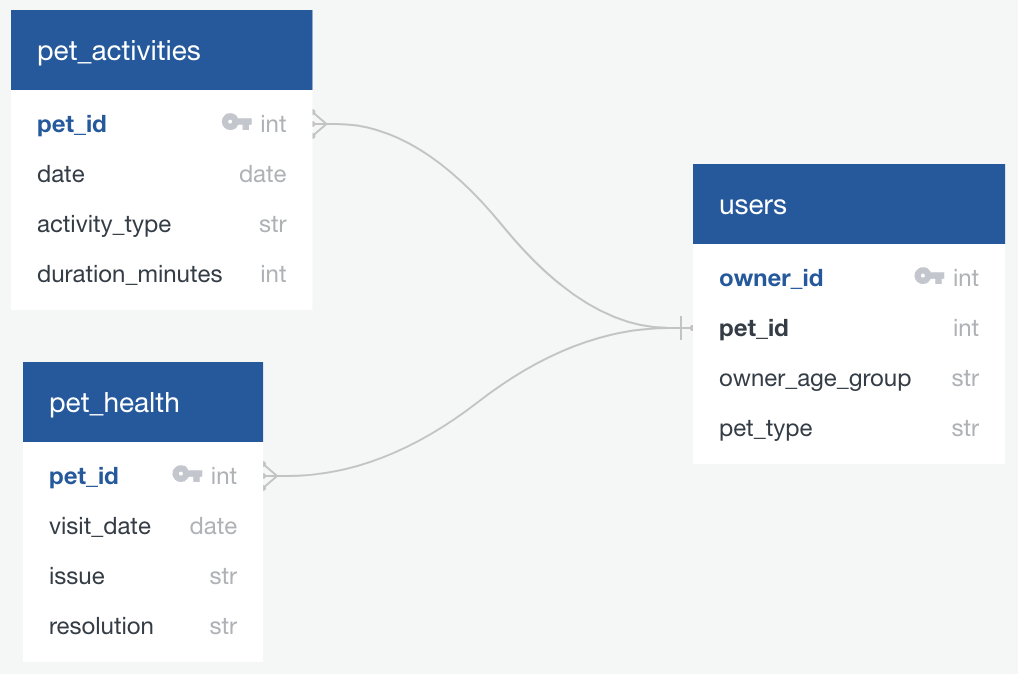

In [9]:
import pandas as pd
import numpy as np

In [5]:
default_filepath = "https://raw.githubusercontent.com/sametgirgin/Data-Science-Notes/refs/heads/main/Data%20Engineering/Datasets"

In [6]:
df_1 = pd.read_csv(default_filepath+ "/pet_activities.csv")
df_1.head()

,index,pet_id,date,activity_type,duration_minutes
0,0,9930,2023-08-01,Resting,-
1,1,3040,2023-07-24,Resting,4
2,2,2381,2023-01-11,Walking,24
3,3,3936,2022-09-15,Walking,73
4,4,8989,2023-02-06,Playing,77


In [7]:
df_2 = pd.read_csv(default_filepath+ "/pet_health.csv")
df_2.head()

,index,pet_id,visit_date,issue,resolution
0,0,9692,2022-10-09,Dental Cleaning,"Cleaning done, no dental issues"
1,1,9186,2022-05-15,Ear Infection,Medication and follow-up in 2 weeks for infection
2,2,2709,2023-12-24,Annual Checkup,"All clear, healthy diet recommended"
3,3,2513,2023-03-18,Annual Checkup,"Vaccination completed, next due in 1 year"
4,4,2016,2023-10-03,Dental Cleaning,"Cleaning done, no dental issues"


In [8]:
df_3 = pd.read_csv(default_filepath+ "/users.csv")
df_3.head()

,index,owner_id,pet_id,owner_age_group,pet_type
0,0,7016,9930,18-25,Dog
1,1,5637,3040,18-25,Rabbit
2,2,5366,2381,18-25,Rabbit
3,3,7063,3936,26-35,Hamster
4,4,3803,8989,36-45,Dog


In [16]:
def all_pet_data(file1, file2, file3):   # Define a function that takes three CSV file paths as input

    # --- Load pet activities data ---
    pa_df = pd.read_csv(file1, parse_dates=['date'])  # Read CSV into DataFrame, parsing 'date' column as datetime

    # --- Load pet health data ---
    ph_df = pd.read_csv(file2, parse_dates=['visit_date'])  # Read CSV, parsing 'visit_date' as datetime

    # --- Load users data ---
    u_df = pd.read_csv(file3)  # Read users CSV into DataFrame (no datetime parsing needed)

    # --- Clean and standardize pet activities (pa_df) ---
    pa_df = pa_df.dropna(subset=['pet_id', 'date'])  # Drop rows where pet_id or date is missing
    pa_df['activity_type'] = pa_df['activity_type'].str.strip()  # Remove leading/trailing spaces in activity_type
    pa_df['activity_type'] = pa_df['activity_type'].replace(
        {"Play": "Playing", "Walk": "Walking", "Rest": "Resting"}
    )  # Standardize activity names
    pa_df['issue'] = np.nan  # Add issue column (default NaN for activity data)
    pa_df['resolution'] = np.nan  # Add resolution column (default NaN for activity data)

    # --- Clean and standardize pet health (ph_df) ---
    ph_df = ph_df.rename(columns={'visit_date': 'date'})  # Rename visit_date to date for consistency
    ph_df = ph_df.dropna(subset=['pet_id', 'date'])  # Drop rows missing pet_id or date
    ph_df['issue'] = ph_df['issue'].str.strip()  # Clean whitespace in issue column
    ph_df['resolution'] = ph_df['resolution'].str.strip()  # Clean whitespace in resolution column
    ph_df['activity_type'] = 'Health'  # Mark all rows as "Health" activity
    ph_df['duration_minutes'] = 0  # Set duration to 0 (not relevant for health visits)

    # --- Clean users data (u_df) ---
    u_df = u_df.dropna(subset=['owner_id'])  # Drop rows missing owner_id
    u_df['owner_age_group'] = u_df['owner_age_group'].str.strip()  # Clean whitespace in age group
    u_df['pet_type'] = u_df['pet_type'].str.strip()  # Clean whitespace in pet type

    # --- Combine activities and health records ---
    pa_ph_df = pd.concat([pa_df, ph_df], axis=0, ignore_index=True)  # Stack pa_df and ph_df into one DataFrame

    # --- Merge with user data ---
    final_df = pa_ph_df.merge(u_df, on='pet_id', how='left')
    # Merge combined activity/health with user data on pet_id, keeping all records (left join)

    # --- Fix data types ---
    final_df['duration_minutes'] = final_df['duration_minutes'].replace('-', np.nan)
    # Replace '-' in duration_minutes with NaN

    final_df['duration_minutes'] = final_df['duration_minutes'].astype(float)
    # Convert duration_minutes to float type

    # Optional: Convert some categorical fields to category dtype (commented out in your code)
    # final_df['activity_type'] = final_df['activity_type'].astype('category')
    # final_df['issue'] = final_df['issue'].astype('category')
    # final_df['resolution'] = final_df['resolution'].astype('category')
    # final_df['owner_age_group'] = final_df['owner_age_group'].astype('category')
    # final_df['pet_type'] = final_df['pet_type'].astype('category')

    # final_df.info()  # (Optional) Show summary of DataFrame

    return final_df  # Return the cleaned and combined dataset

# --- Run the function on sample files ---
all_pet_data(default_filepath+"/pet_activities.csv", default_filepath+'/pet_health.csv', default_filepath+'/users.csv')

,index_x,pet_id,date,activity_type,duration_minutes,issue,resolution,index_y,owner_id,owner_age_group,pet_type
0,0,9930,2023-08-01,Resting,NaN,NaN,NaN,0,7016,18-25,Dog
1,1,3040,2023-07-24,Resting,4.0,NaN,NaN,1,5637,18-25,Rabbit
2,2,2381,2023-01-11,Walking,24.0,NaN,NaN,2,5366,18-25,Rabbit
3,3,3936,2022-09-15,Walking,73.0,NaN,NaN,3,7063,26-35,Hamster
4,4,8989,2023-02-06,Playing,77.0,NaN,NaN,4,3803,36-45,Dog
...,...,...,...,...,...,...,...,...,...,...,...
1873,935,9136,2022-04-15,Health,0.0,Annual Checkup,"All clear, healthy diet recommended",519,3553,18-25,Dog
1874,936,3228,2023-07-30,Health,0.0,Injury,Physical therapy recommended for joint issues,490,8432,66+,Fish
1875,937,9163,2023-01-20,Health,0.0,Annual Checkup,"Vaccination completed, next due in 1 year",143,8254,46-55,Hamster
1876,938,2805,2022-05-28,Health,0.0,Injury,"Sprain identified, rest and limited movement a...",295,6327,36-45,Rabbit
